In [95]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

In [14]:
! pip install -q kaggle
from google.colab import files 
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! mkdir digit_recognizer

mkdir: cannot create directory ‘digit_recognizer’: File exists


In [18]:
! ls

 digit_recognizer   kaggle.json   sample_submission.csv   train.csv
'kaggle (1).json'   sample_data   test.csv


In [19]:
! ls digit_recognizer/

test.csv.zip  train.csv.zip


In [ ]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 31.7MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.7MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.6MB/s]
 55% 5.00M/9.16M [00:00<00:00, 30.8MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.8MB/s]


In [ ]:
! ls

digit_recognizer  sample_data		 test.csv
kaggle.json	  sample_submission.csv  train.csv


In [ ]:
! mv train.csv.zip digit_recognizer/
! mv test.csv.zip digit_recognizer/

In [20]:
! unzip digit_recognizer/train.csv.zip
! unzip digit_recognizer/test.csv.zip 

Archive:  digit_recognizer/train.csv.zip
caution: filename not matched:  digit_recognizer/
Archive:  digit_recognizer/test.csv.zip
caution: filename not matched:  digit_recognizer/


In [21]:
! mv train.csv digit_recognizer/
! mv test.csv digit_recognizer/


In [22]:
! ls digit_recognizer/

test.csv  test.csv.zip	train.csv  train.csv.zip


In [164]:
# ! mv digit_recognizer/train.csv .
# ! mv digit_recognizer/test.csv .
df = pd.read_csv("train.csv")
# df.head()
train_label = df["label"]
train_image = df.drop("label", axis = 1)

In [165]:
train_image, test_image, train_label, test_label = train_test_split(
    train_image, train_label, test_size=0.2, random_state=42)

In [166]:
train_image = tf.reshape(train_image, [33600, 28 ,28]).numpy()
test_image = tf.reshape(test_image, [8400, 28 ,28]).numpy()

In [167]:
train_label = np.array(train_label)
test_label = np.array(test_label)

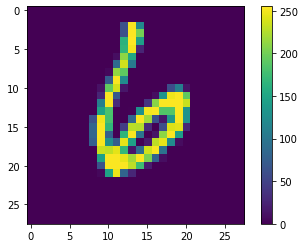

In [168]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

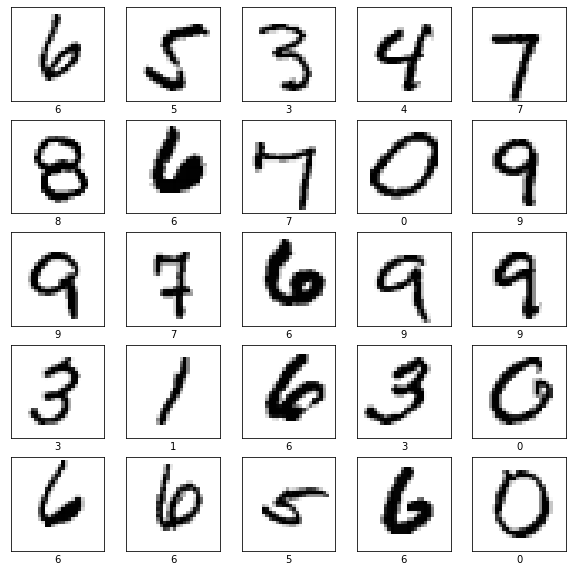

In [169]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

In [203]:
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=5, min_delta=0.0001)

In [204]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation = "relu"),
                             tf.keras.layers.Dropout(.15, input_shape=(28,28)),
                             tf.keras.layers.Dense(10)
])

In [205]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [206]:
model.fit(train_image,train_label, epochs=20, callbacks=[es])

Epoch 1/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5618 - accuracy: 0.8397
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1775 - accuracy: 0.9467
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1266 - accuracy: 0.9618
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0977 - accuracy: 0.9687
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0805 - accuracy: 0.9758
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0655 - accuracy: 0.9797
Epoch 00006: early stopping


In [207]:
test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)


263/263 - 0s - loss: 0.0961 - accuracy: 0.9715

Test accuracy: 0.9715476036071777


263/263 - 0s - loss: 0.0961 - accuracy: 0.9715


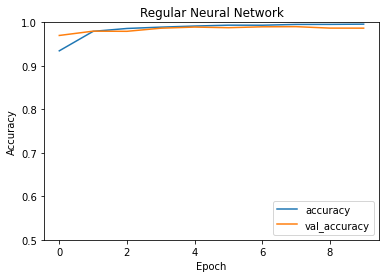

In [208]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Regular Neural Network")

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)


In [209]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

In [210]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i].reshape(28,28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


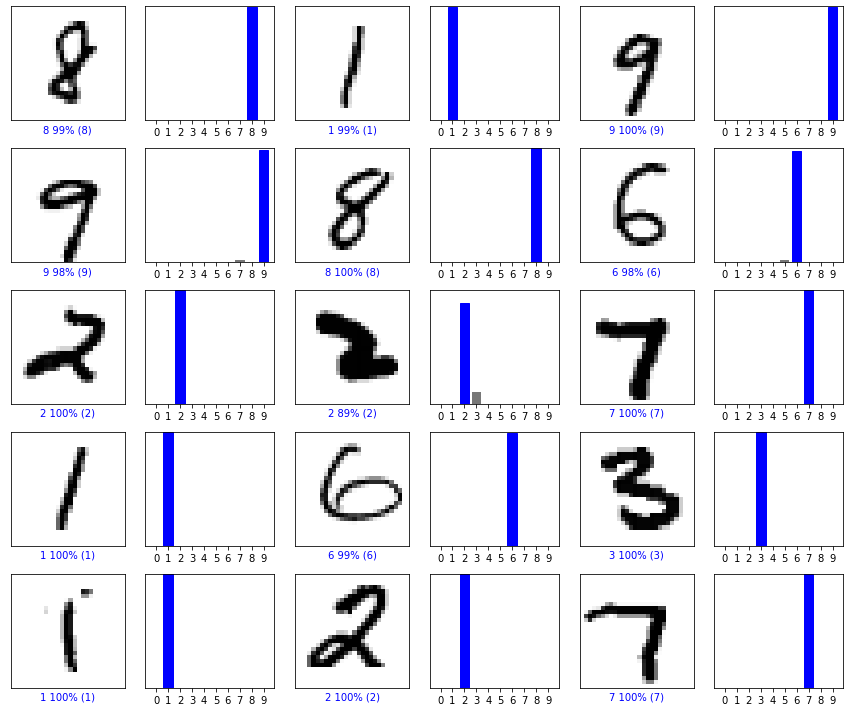

In [211]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()


In [179]:
train_image.shape

(33600, 28, 28)

Same dataset however this time with CNN


In [180]:
train_image, test_image = train_image / 255.0, test_image / 255.0

In [212]:
train_image = train_image.reshape(33600,28,28,1)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [213]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_30 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)              

In [214]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_image, train_label, epochs=10, 
                    validation_data=(test_image, test_label))


Epoch 1/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.4837 - accuracy: 0.8449 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 2/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0615 - accuracy: 0.9802 - val_loss: 0.0461 - val_accuracy: 0.9863
Epoch 3/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0411 - val_accuracy: 0.9870
Epoch 4/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 5/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0464 - val_accuracy: 0.9857
Epoch 6/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0343 - val_accuracy: 0.9901
Epoch 7/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0307 -

263/263 - 2s - loss: 0.0370 - accuracy: 0.9904


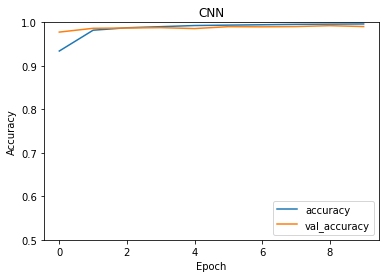

In [215]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("CNN")

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)


In [216]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

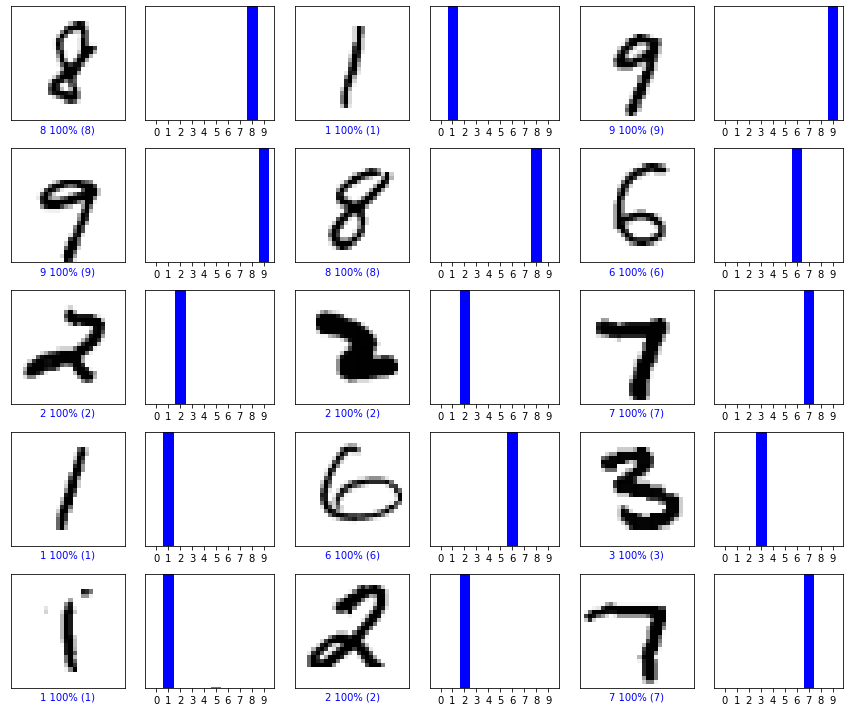

In [217]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()
